1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

The eigenvectors using the eigendecomposition of the covariance matrix

 [[-0.12412178 -0.81649658  0.56385026]
 [-0.56645094 -0.40824829 -0.71586777]
 [-0.81469449  0.40824829  0.41183275]] 

The eigenvalues using the eigendecomposition of the covariance matrix:

  [ 2.55306824e+01 -4.62674531e-16  2.02080324e+00]

The eigenvectors using the SVD

 [[-0.12412178 -0.81649658  0.56385026]
 [-0.56645094 -0.40824829 -0.71586777]
 [-0.81469449  0.40824829  0.41183275]] 

The eigenvalues using the SVD:

  [2.55306824e+01 4.98716690e-16 2.02080324e+00]

Eigenvectors yield same result?:  True
Eigenvalues yield same result?  True 

Percentage of retained variability with component 0, 1 and 2:  100.0
Percentage of retained variability with component 0 and 1:  92.66535655536087
Percentage of retained variability with component 0 and 2:  100.0
Percentage of retained variability with component 1 and 2:  7.334643444639129


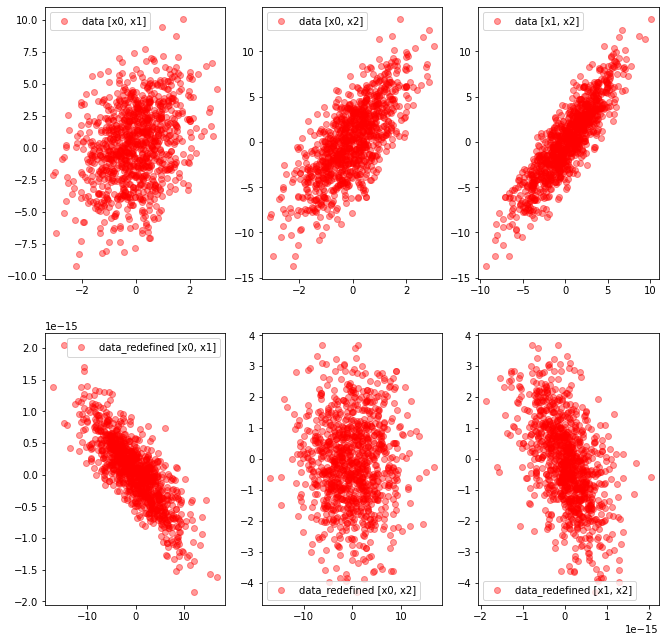

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la
from numpy.linalg import eig
N = 1000
x1 = np.random.normal(0, 1, size = N)
x2 = x1 + np.random.normal(0, 3, size = N)
x3 = (2 * x1) + x2
dataset = np.vstack((x1, x2, x3))
cov_matrix = np.cov(dataset)
l, V = la.eig(cov_matrix)
l = np.real_if_close(l)
print("The eigenvectors using the eigendecomposition of the covariance matrix\n\n", V, "\n")
print("The eigenvalues using the eigendecomposition of the covariance matrix:\n\n ", l)

U, S, Vt = la.svd(cov_matrix)

S[1], S[2] = S[2], S[1]
l_svd = S
U[:, [1, 2]] = U[:, [2, 1]]
V_svd = U

print("\nThe eigenvectors using the SVD\n\n", V_svd, "\n")
print("The eigenvalues using the SVD:\n\n ", l_svd)

print('\nEigenvectors yield same result?: ', np.allclose(V,V_svd))
print('Eigenvalues yield same result? ', np.allclose(l,l_svd), '\n')

print("Percentage of retained variability with component 0, 1 and 2: ", np.sum([l[0:3]]) / np.sum(l) * 100)
print("Percentage of retained variability with component 0 and 1: ", np.sum([l[0], l[1]]) / np.sum(l) * 100)
print("Percentage of retained variability with component 0 and 2: ", np.sum([l[0], l[2]]) / np.sum(l) * 100)
print("Percentage of retained variability with component 1 and 2: ", np.sum([l[1], l[2]]) / np.sum(l) * 100)

dataset_redefined = np.dot(V.T, dataset)

fig, axes = plt.subplots(2,3,figsize=(11, 11))
axes[0,0].scatter(dataset[0,:],dataset[1,:], label = "data [x0, x1]", alpha = 0.4, color = "red")
axes[0,0].legend()
axes[0,1].scatter(dataset[0,:],dataset[2,:], label = "data [x0, x2]", alpha = 0.4, color = "red")
axes[0,1].legend()
axes[0,2].scatter(dataset[1,:],dataset[2,:], label = "data [x1, x2]", alpha = 0.4, color = "red")
axes[0,2].legend()
axes[1,0].scatter(dataset_redefined[0,:],dataset_redefined[1,:], label = "data_redefined [x0, x1]", alpha = 0.4, color = "red")
axes[1,0].legend()
axes[1,1].scatter(dataset_redefined[0,:],dataset_redefined[2,:], label = "data_redefined [x0, x2]", alpha = 0.4, color = "red")
axes[1,1].legend()
axes[1,2].scatter(dataset_redefined[1,:],dataset_redefined[2,:], label = "data_redefined [x1, x2]", alpha = 0.4, color = "red")
axes[1,2].legend()
plt.show()

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la
from numpy.linalg import eig
noises = np.random.normal(size=(N,3),scale=(1/50))
noised_dataset = dataset + np.sum(noises.T)
cov_matrix_noised = np.cov(noised_dataset)
l_n, V_n = la.eig(cov_matrix_noised)
l_n = np.real_if_close(l_n)
print("The eigenvectors using the eigendecomposition of the covariance matrix\n\n", V_n, "\n")
print("The eigenvalues using the eigendecomposition of the covariance matrix:\n\n", l_n)

U_n, S_n, Vt_n = la.svd(cov_matrix_noised)

S_n[1], S_n[2] = S_n[2], S_n[1]
l_svd_n = S_n
U_n[:, [1, 2]] = U_n[:, [2, 1]]
V_svd_n = U_n

print("\nThe eigenvectors using the SVD\n\n", V_svd_n, "\n")
print("The eigenvalues using the SVD:\n\n", l_svd_n)

print('\nEigenvectors yield same result?: ', np.allclose(V_n,V_svd_n))
print('Eigenvalues yield same result? ', np.allclose(l_n,l_svd_n), '\n')

print("Percentage of retained variability with component 0, 1 and 2: ", np.sum([l_n[0:3]]) / np.sum(l_n) * 100)
print("Percentage of retained variability with component 0 and 1: ", np.sum([l_n[0], l_n[1]]) / np.sum(l_n) * 100)
print("Percentage of retained variability with component 0 and 2: ", np.sum([l_n[0], l_n[2]]) / np.sum(l_n) * 100)
print("Percentage of retained variability with component 1 and 2: ", np.sum([l_n[1], l_n[2]]) / np.sum(l_n) * 100)

print("\nAs we see, the variability is exact the same compared to our first results.")
print("This is happening because the noise we added is not correlated with the 3 variables.")
print("That means the noise we added, did not effect the characteristic of our dataset.")

The eigenvectors using the eigendecomposition of the covariance matrix

 [[-0.12412178 -0.81649658  0.56385026]
 [-0.56645094 -0.40824829 -0.71586777]
 [-0.81469449  0.40824829  0.41183275]] 

The eigenvalues using the eigendecomposition of the covariance matrix:

 [ 2.55306824e+01 -4.62674531e-16  2.02080324e+00]

The eigenvectors using the SVD

 [[-0.12412178 -0.81649658  0.56385026]
 [-0.56645094 -0.40824829 -0.71586777]
 [-0.81469449  0.40824829  0.41183275]] 

The eigenvalues using the SVD:

 [2.55306824e+01 4.98716690e-16 2.02080324e+00]

Eigenvectors yield same result?:  True
Eigenvalues yield same result?  True 

Percentage of retained variability with component 0, 1 and 2:  100.0
Percentage of retained variability with component 0 and 1:  92.66535655536087
Percentage of retained variability with component 0 and 2:  100.0
Percentage of retained variability with component 1 and 2:  7.334643444639129

As we see, the variability is exact the same compared to our first results.
Thi

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 